# **Data Preprocessing - Salifort Motors**

This notebook focuses on the data preprocessing phase of the project. It includes the essential steps such as **importing required libraries, loading the dataset, performing initial data cleaning, and analyzing potential outliers.** These steps are crucial to ensure that the data is clean, consistent, and ready for further analysis or modeling.

## Library Imports

In [12]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [13]:
# Load dataset
df0 = pd.read_csv('Salifort_Motors_HR_dataset.csv')

# Display first 10 rows
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Data Exploration

In [14]:
# Basic information about the data
df0.info()

# Descriptive stats
df0.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [15]:
# Rename columns
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Work_accident': 'work_accident',
                          'Department': 'department'})

# Display column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [16]:
# Check for missing values
df0.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


**-> there are no missing values in the data.**

In [17]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

**-> 3,008 rows contain duplicates. That is 20% of the data.**

In [18]:
# Drop duplicates and save resulting dataframe
df1 = df0.drop_duplicates(keep='first')

## Outlier Analysis

In [19]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Conclusion:** <br>
The maximum value of the **'tenure'** column is significantly higher than the third quartile (75th percentile), which may indicate the presence of outliers.

To investigate this further, we examine the interquartile range (IQR).

In [22]:
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)

IQR = Q3 - Q1

LowBound = Q1 - 1.5 * IQR
UppBound = Q3 + 1.5 * IQR

In [33]:
print(f'Interquartile Range: {IQR}')
print(f'Lower Bound: {LowBound}')
print(f'Upper Bound: {UppBound}')
print('Max value:', df1['tenure'].max())

Interquartile Range: 1.0
Lower Bound: 1.5
Upper Bound: 5.5
Max value: 10


In [39]:
# Determine the number of rows containing outliers
outliers_tenure = df1[(df1['tenure'] > UppBound) | (df1['tenure'] < LowBound)]

print('Number of rows containing outliers in tenure:', len(outliers_tenure))

Number of rows containing outliers in tenure: 824


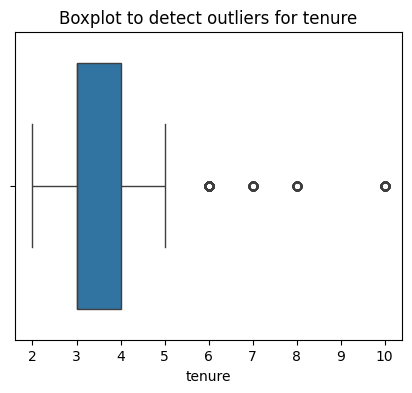

In [37]:
plt.figure(figsize=(5,4))
plt.title('Boxplot to detect outliers for tenure')
sns.boxplot(x=df1['tenure'])
plt.show()

**Conclusion**: <br>
The max value (10) exceeds the Upper Bound (5.5), which indicates the presence of outliers. <br>
In total there are 824 rows that contain outliers in the 'tenure' column.

## Save cleaned dataset

In [40]:
df1.to_csv('Salifort_Motors_HR_dataset_cleaned.csv', index=False)